In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [34]:
df=pd.read_csv(r"F:\ML\100 days ml\data\train.csv",usecols=['Age','Fare','Survived'])

In [35]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [36]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [37]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [39]:
x_train["Age_imputed"]=x_train["Age"]
x_test['Age_imputed']=x_test["Age"]

In [40]:
x_train['Age_imputed'][x_train["Age_imputed"].isnull()]=x_train["Age"].dropna().sample(x_train["Age"].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [41]:
x_train.tail()

,Age,Fare,Age_imputed
106,21.0,7.6500,21.0
270,NaN,31.0000,28.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0
102,21.0,77.2875,21.0


In [42]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([25.  , 59.  , 16.  , 32.  , 28.  , 51.  , 50.  ,  3.  ,  4.  ,
        1.  , 42.  , 24.5 , 32.  , 54.  ,  9.  , 36.  ,  2.  , 24.  ,
       30.  , 45.  , 23.  , 35.  , 24.  , 39.  ,  0.42, 18.  , 28.  ,
       24.  , 29.  , 37.  , 20.  , 30.  , 50.  , 24.  , 27.  , 23.  ,
       18.  , 16.  , 62.  , 16.  , 16.  ,  2.  , 13.  , 27.  , 29.  ,
       19.  , 24.  , 25.  ,  2.  , 30.  , 38.  , 25.  , 19.  , 43.  ,
        6.  , 32.  , 34.  , 25.  , 33.  , 25.  , 42.  , 40.  , 17.  ,
       37.  , 21.  , 20.  , 17.  , 39.  , 21.  , 22.  , 52.  , 43.  ,
       21.  , 27.  , 21.  , 52.  , 45.  , 32.  ,  2.  , 21.  , 25.  ,
       31.  , 27.  ,  5.  , 22.  , 34.  , 39.  , 52.  , 27.  , 44.  ,
       18.  , 20.  , 30.  , 35.  , 36.  , 19.  , 27.  , 56.  , 16.  ,
        8.  , 35.  , 19.  , 34.  , 51.  , 58.  , 29.  , 55.  , 40.  ,
       50.  , 42.  , 32.  , 38.  , 28.  , 31.  , 19.  , 28.  ,  7.  ,
       33.  , 35.  , 54.  , 35.  , 25.  , 33.  , 26.  , 26.  , 16.  ,
       44.  , 40.5 ,

In [43]:
x_train['Age'].isnull().sum()

140

C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\307661403.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label="Original",hist=False)
C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\307661403.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["Age

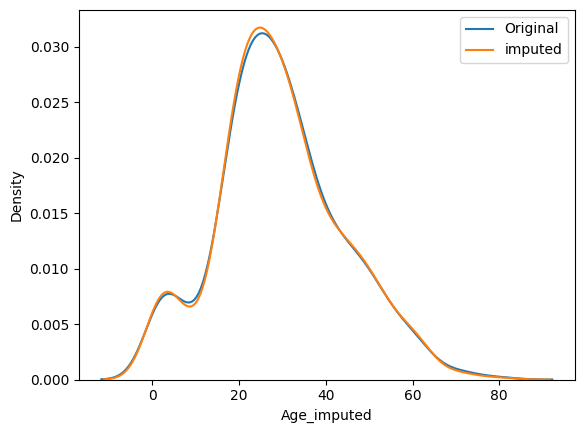

In [44]:
sns.distplot(x_train['Age'],label="Original",hist=False)
sns.distplot(x_train["Age_imputed"],label="imputed",hist=False)
plt.legend()
plt.show()

In [46]:
print("orginal variable variance ",x_train["Age"].var())
print("Vriance after imputation ",x_train["Age_imputed"].var())

orginal variable variance  210.2517072477435
Vriance after imputation  208.21555149397906


In [47]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,67.374222
Age,71.580633,210.251707,210.251707
Age_imputed,67.374222,210.251707,208.215551


<Axes: >

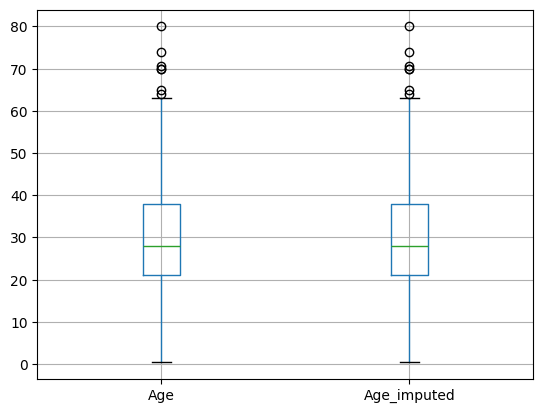

In [49]:
x_train[['Age','Age_imputed']].boxplot()

In [53]:
data=pd.read_csv(r"F:\ML\100 days ml\data\train-house.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [55]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [61]:
x=data
y=data['SalePrice']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [63]:
x_train["GarageQual_imputed"]=x_train['GarageQual']
x_train['FireplaceQu_imputed']=x_train['FireplaceQu']

x_test['GarageQual_imputed']=x_test['GarageQual']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [66]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()]=x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values


C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\4246619557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\4246619557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\4246619557.py:4: SettingWithCopyWarning: 
A value i

In [69]:
x_test['FireplaceQu_imputed'].isnull().sum()

0

In [ ]:
temp=pd.concat(
    [
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts() / len(x_train)
    ],
    axis=1
)
temp.columns=['original', 'imputed']

In [73]:
temp.head(1)

,original,imputed
TA,0.951087,0.952911


In [74]:
temp2=pd.concat(
    [
        x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
        x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
    ],
    axis=1
)
temp2.columns=['original','imputed']

In [75]:
temp2.head(1)

,original,imputed
Gd,0.491143,0.491438


C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

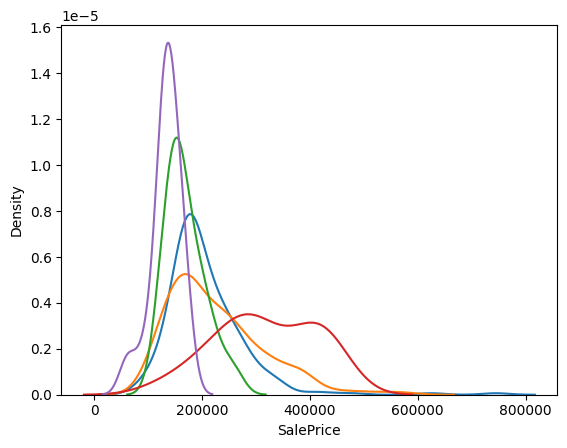

In [76]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\699422180.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\Gargi\AppData\Local\Temp\ipykernel_8420\699422180.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

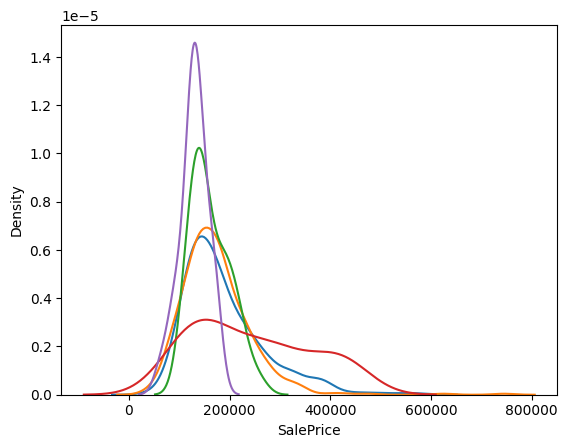

In [78]:
for category in x_train['FireplaceQu_imputed'].unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
plt.show()